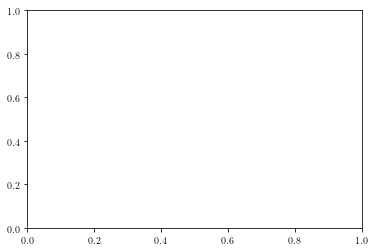

In [48]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from math import sqrt
from random import seed
from random import random
from time import time
import statistics as stat

duration = 10**2
ensemble_size = 10**2
number_of_time_lapses = duration
number_of_bins = number_of_time_lapses
bx = 1
by = 1
b = 1
plt.rc('text', usetex=True)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = list(range(number_of_time_lapses))
y = list(range(number_of_time_lapses))
r = list(range(number_of_time_lapses))
x[0] = 0
y[0] = 0
datax = []
datay = []
cord = [[]]

def get_gyration_endtoend_radius(number_of_chains = 200,thetab =math.pi/3 ,show = False):
    
    global datax 
    global datay
    global x,y,r
    global Rg,Rf
    global cord
    Rg = list(range(ensemble_size))
    Rf = list(range(ensemble_size))
    x = list(range(number_of_chains))
    y = list(range(number_of_chains))
    r = list(range(number_of_chains))
    x[0] = 0
    x[1] = b
    y[0] = 0
    y[1] = 0
    
    datax = []
    datay = []
    Rf_sum = 0
    for _iter in range(ensemble_size):
        seed(_iter)
        for i in range(1,number_of_chains-1):
            r = random()
            r = (math.floor(r - 0.5) + math.ceil(r - 0.5))
            if (x[i] != x[i-1]):
                theta = math.atan((y[i]-y[i-1])/(x[i]-x[i-1]))
            else:
                theta = math.pi/2
                
            if (theta == 0 and (x[i]-x[i-1]) > 0):
                x[i+1] = x[i] + b*math.cos(r*thetab)
                y[i+1] = y[i] + b*math.sin(r*thetab)
            elif( theta == 0 and (x[i]-x[i-1]) < 0):
                x[i+1] = x[i] + b*math.cos(math.pi + r*thetab)
                y[i+1] = y[i] + b*math.sin(math.pi + r*thetab)
            elif (theta < 0 and (y[i]-y[i-1])>0):
                x[i+1] = x[i] + b*math.cos(math.pi+theta+r*thetab)
                y[i+1] = y[i] + b*math.sin(math.pi+theta+r*thetab)
            elif(theta < 0 and (y[i]-y[i-1])<0):
                x[i+1] = x[i] + b*math.cos(theta+r*thetab)
                y[i+1] = y[i] + b*math.sin(theta+r*thetab)
            elif(theta > 0 and (y[i]-y[i-1])<0):
                x[i+1] = x[i] + b*math.cos(math.pi+theta+r*thetab)
                y[i+1] = y[i] + b*math.sin(math.pi+theta+r*thetab)
            else:
                x[i+1] = x[i] + b*math.cos(theta+r*thetab)
                y[i+1] = y[i] + b*math.sin(theta+r*thetab)

            datax.append(x[i])
            datay.append(y[i])
        for i in range(1,number_of_chains):
            for j in range(1,number_of_chains):
                Rf_sum += ((x[i]-x[i-1])*(x[j]-x[j-1])+(y[i]-y[i-1])*(y[j]-y[j-1]))
        #Rg[_iter] = np.mean(r)
        #Rf[_iter] = math.sqrt((x[number_of_chains-1] - x[1])**2+ (y[number_of_chains-1] - y[1])**2)
                
             
    Rg_mean = 0
    Rf_mean = Rf_sum/ensemble_size
    #print(Rg_mean)
    if (show == True):
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1],labels[::-1],title ='Peclet Numbers',loc = 'upper left')
        cord = np.empty((2,number_of_chains))
        cord[0,:] = x
        cord[1,:] = y
    return (Rg_mean,Rf_mean)
#avg_dist = dist_tau/avg_count
#print(avg_dist)

In [115]:
Rg_mean,Rf_mean = get_gyration_endtoend_radius(200,math.pi/2,True)
Rf_mean= Rf_mean
print(Rf_mean)

159.28


Text(0.5, 1.0, 'Polymer Simulation with $\\theta_b$ $= \\pi/2$ and number of chains $= 200$')

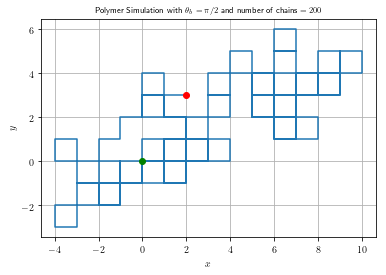

In [116]:
xlim = np.linspace(-30, 30, number_of_time_lapses)
ylim = np.linspace(-30, 30, number_of_time_lapses)
X, Y = np.meshgrid(xlim,ylim)
#F = X**2 + Y**2 - math.sqrt(Rf_mean)**2

fig, ax = plt.subplots()
#ax.contour(X,Y,F,[0])
ax.plot(cord[0],cord[1])
ax.plot(cord[0,0],cord[1,0], 'go')
ax.plot(cord[0,-1], cord[1,-1], 'ro')
#demo = "Averaged gyration radius of "+str(ensemble_size)+" Polymers"
#ax.annotate(demo, xy=(Rf_mean/sqrt(2), Rf_mean/sqrt(2)),  xycoords='data',
#            xytext=(1, 1), textcoords='axes fraction',
#            arrowprops=dict(facecolor='Orange', shrink=0.05),
#            horizontalalignment='left', verticalalignment='top',
#            )
ax.axis('equal')
ax.grid(True)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Polymer Simulation with $\\theta_b$ $= \pi/2$ and number of chains $= 200$', fontsize=8)

In [70]:
#Finding the exponent of Rf vs. N by varying N

N = [50,100,200,400,500]
RfNs = []
for n in N:
    Rg_mean,Rf_mean = get_gyration_endtoend_radius(n,math.pi/3,False)
    RfNs.append(math.sqrt(Rf_mean))


1
1
1
1
1


0.5151408203356931 0.4404894262373835


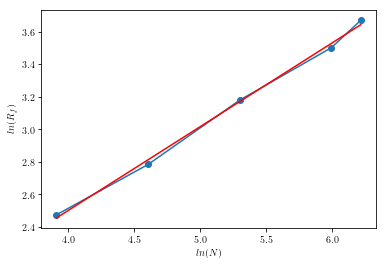

In [81]:
plt.plot(np.log(N),np.log(RfNs),"-o",)

plt.xlabel("$ln(N)$")
plt.ylabel("$ln(R_f)$")
m,n =  np.polyfit(np.log(N),np.log(RfNs),1)
plt.plot(np.log(N),m*np.log(N)+n,"r")
print (m , n)

In [108]:
#Finding Rf^2/Nb^2 as function of bound angle

Thetabs = [math.pi/6,math.pi/4,math.pi/3,math.pi/2]

Rf2Nb2 = []

for theta in Thetabs:
    Rf2Nb2.append(get_gyration_endtoend_radius(200,theta,False)[1])



Text(0, 0.5, '$Rf^2/Nb^2$')

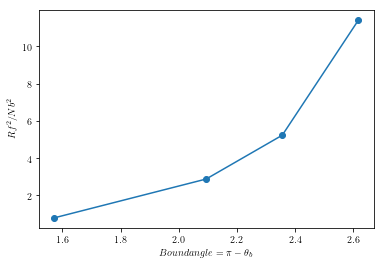

In [109]:
plt.plot(math.pi - np.array(Thetabs),np.array(Rf2Nb2)/200,"-o",)

plt.xlabel("$Bound angle = \\pi - \\theta_b $")
plt.ylabel("$Rf^2/Nb^2$")


C:\Users\mhmas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '$(1+cos\\theta_b)/(1-cos\\theta_b)$')

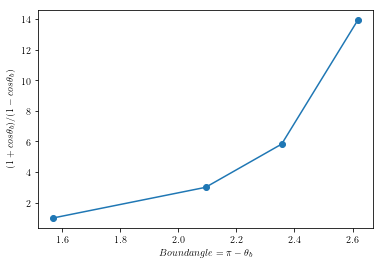

In [105]:
plt.plot(math.pi - np.array(Thetabs),(1+np.cos(Thetabs))/(1-np.cos(Thetabs)),"-o",)

plt.xlabel("$Bound angle = \\pi - \\theta_b $")
plt.ylabel("$(1+cos\\theta_b)/(1-cos\\theta_b)$")